# **IMPORT LIBRARIES**

In [ ]:
#Import libraries
import pandas as pd
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# **READ THE DATA**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Specify the path to the excel file
file_path = '/content/drive/MyDrive/Highlights-of-Population-Projections.xlsx'

# Read the Excel file into a pandas DataFrame
population_df = pd.read_excel(file_path, header=2)

population_df

,County,2019,2020,2021,2022
0,Kenya,47564,48818,49720,50623
1,Mombasa,1208,1228,1256,1284
2,Kwale,866,879,901,923
3,Kilifi,1453,1489,1518,1548
4,Tana River,315,326,335,344
5,Lamu,143,155,159,163
6,Taita/Taveta,340,351,355,360
7,Garissa,841,861,883,905
8,Wajir,781,804,826,848
9,Mandera,867,887,911,935


In [ ]:
# Check the data structure
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   County  48 non-null     object
 1   2019    48 non-null     object
 2   2020    48 non-null     int64 
 3   2021    48 non-null     int64 
 4   2022    48 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.0+ KB


Observation:

The 2019 column contains a mix of numeric and non-numeric values, which prevents it from being correctly identified as an integer column. The goal is to clean this column, ensuring it only contains numeric values.

In [ ]:
# Check for missing values
print('Sum of Missing Values:')
print(population_df.isnull().sum())
print('')
# Display basic statistics
print("Basic Statistics:")
print(population_df.describe())

Sum of Missing Values:
County    0
2019      0
2020      0
2021      0
2022      0
dtype: int64

Basic Statistics:
               2020          2021          2022
count     48.000000     48.000000     48.000000
mean    2034.145833   2071.645833   2109.250000
std     6931.938555   7060.002840   7188.187525
min      155.000000    159.000000    163.000000
25%      635.500000    645.000000    652.500000
50%      915.500000    931.000000    946.000000
75%     1186.000000   1210.000000   1240.750000
max    48818.000000  49720.000000  50623.000000


# **DATA CLEANING**

Remove Extra Commas:
In the Meru and Machakos rows, there are extra commas. We'll remove those to ensure the data is in the correct format.

In [ ]:
population_df.columns

Index(['County', 2019, 2020, 2021, 2022], dtype='object')

In [ ]:
# Display unique values in 2019 column
print(population_df[2019].unique())

[47564 1208 866 1453 315 143 340 841 781 867 459 268 '1,545,' 393 608 1136
 '1,421,' 987 638 759 610 1056 2417 926 621 310 990 1163 454 885 666 518
 2162 1157 1117 901 875 1867 590 1670 893 993 1155 1131 1116 1266 605 4397]


In [ ]:
# Replace commas and convert to numeric for the 2019 column
population_df[2019] = population_df[2019].replace(',', '', regex=True)

# Convert 2019 column to integer
population_df[2019] = population_df[2019].astype(int)

# Check data types
print(population_df.dtypes)

County    object
2019       int64
2020       int64
2021       int64
2022       int64
dtype: object


# **SEPARATE KENYAN POPULATION AND COUNTY POPULATION**

In [ ]:
# Separate the first row (Kenyan population) and the rest (County populations)
kenyan_population = population_df.iloc[0:1]
county_population = population_df.iloc[1:]

# Display the DataFrames
print("Kenyan Population:")
print(kenyan_population)

print("\nCounty Population:")
print(county_population)

Kenyan Population:
  County   2019   2020   2021   2022
0  Kenya  47564  48818  49720  50623

County Population:
             County  2019  2020  2021  2022
1           Mombasa  1208  1228  1256  1284
2             Kwale   866   879   901   923
3            Kilifi  1453  1489  1518  1548
4        Tana River   315   326   335   344
5              Lamu   143   155   159   163
6      Taita/Taveta   340   351   355   360
7           Garissa   841   861   883   905
8             Wajir   781   804   826   848
9           Mandera   867   887   911   935
10         Marsabit   459   480   491   503
11           Isiolo   268   294   301   309
12             Meru  1545  1565  1586  1606
13    Tharaka-Nithi   393   403   408   412
14             Embu   608   629   635   642
15            Kitui  1136  1186  1201  1215
16         Machakos  1421  1442  1457  1472
17          Makueni   987  1008  1019  1031
18        Nyandarua   638   657   670   683
19            Nyeri   759   810   818   827
20     

In [ ]:
# Display basic statistics
print("County Basic Statistics:")
print(county_population.describe())

County Basic Statistics:
              2019         2020         2021         2022
count    47.000000    47.000000    47.000000    47.000000
mean   1011.468085  1038.744681  1057.851064  1077.042553
std     693.268655   709.187792   722.010748   734.723875
min     143.000000   155.000000   159.000000   163.000000
25%     609.000000   634.000000   644.000000   651.000000
50%     893.000000   914.000000   930.000000   942.000000
75%    1156.000000  1184.500000  1208.500000  1235.500000
max    4397.000000  4516.000000  4594.000000  4672.000000


Observation:

Over the observed years (2019-2022), there's a consistent upward trend in the mean values, suggesting overall growth. The increasing standard deviation indicates a widening spread of data. The rise in minimum values implies an upward shift in the lowest recorded figures across the 47 counties.

# **EXPLORATORY DATA ANALYSIS**

## **Kenya Population Trend (2019-2022)**

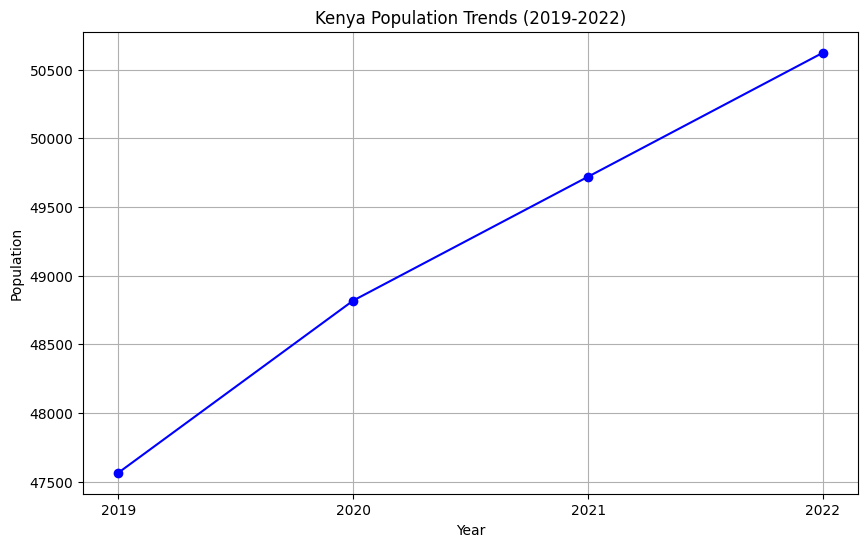

In [ ]:
# Visualize the population trends with a line graph
plt.figure(figsize=(10, 6))

county = kenyan_population['County'].iloc[0]
population_values = kenyan_population.drop('County', axis=1).iloc[0]

population_values.index = population_values.index.astype(int)

plt.plot(population_values.index, population_values, marker='o', linestyle='-', color='blue')

plt.title(f'{county} Population Trends (2019-2022)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid(True)

# Set the X-axis ticks without decimals
plt.xticks(population_values.index)

plt.show()

Observation:

The line plot for Kenyan population over the years (2019 to 2022) reveals a consistent and steady increase in population. The trend shows a continuous upward trajectory, indicating a sustained growth in the overall population of Kenya during this period. What is the growth rate of the Kenyan Population?

In [ ]:
# Calculate the growth rate for Kenyan population
kenyan_population_growth_rate = ((kenyan_population.iloc[0, -1] - kenyan_population.iloc[0, 1]) / kenyan_population.iloc[0, 1]) * 100

print(f"The growth rate of Kenyan population from 2019 to 2022 is: {kenyan_population_growth_rate:.2f}%")

The growth rate of Kenyan population from 2019 to 2022 is: 6.43%


## **Population Distribution Across Counties**

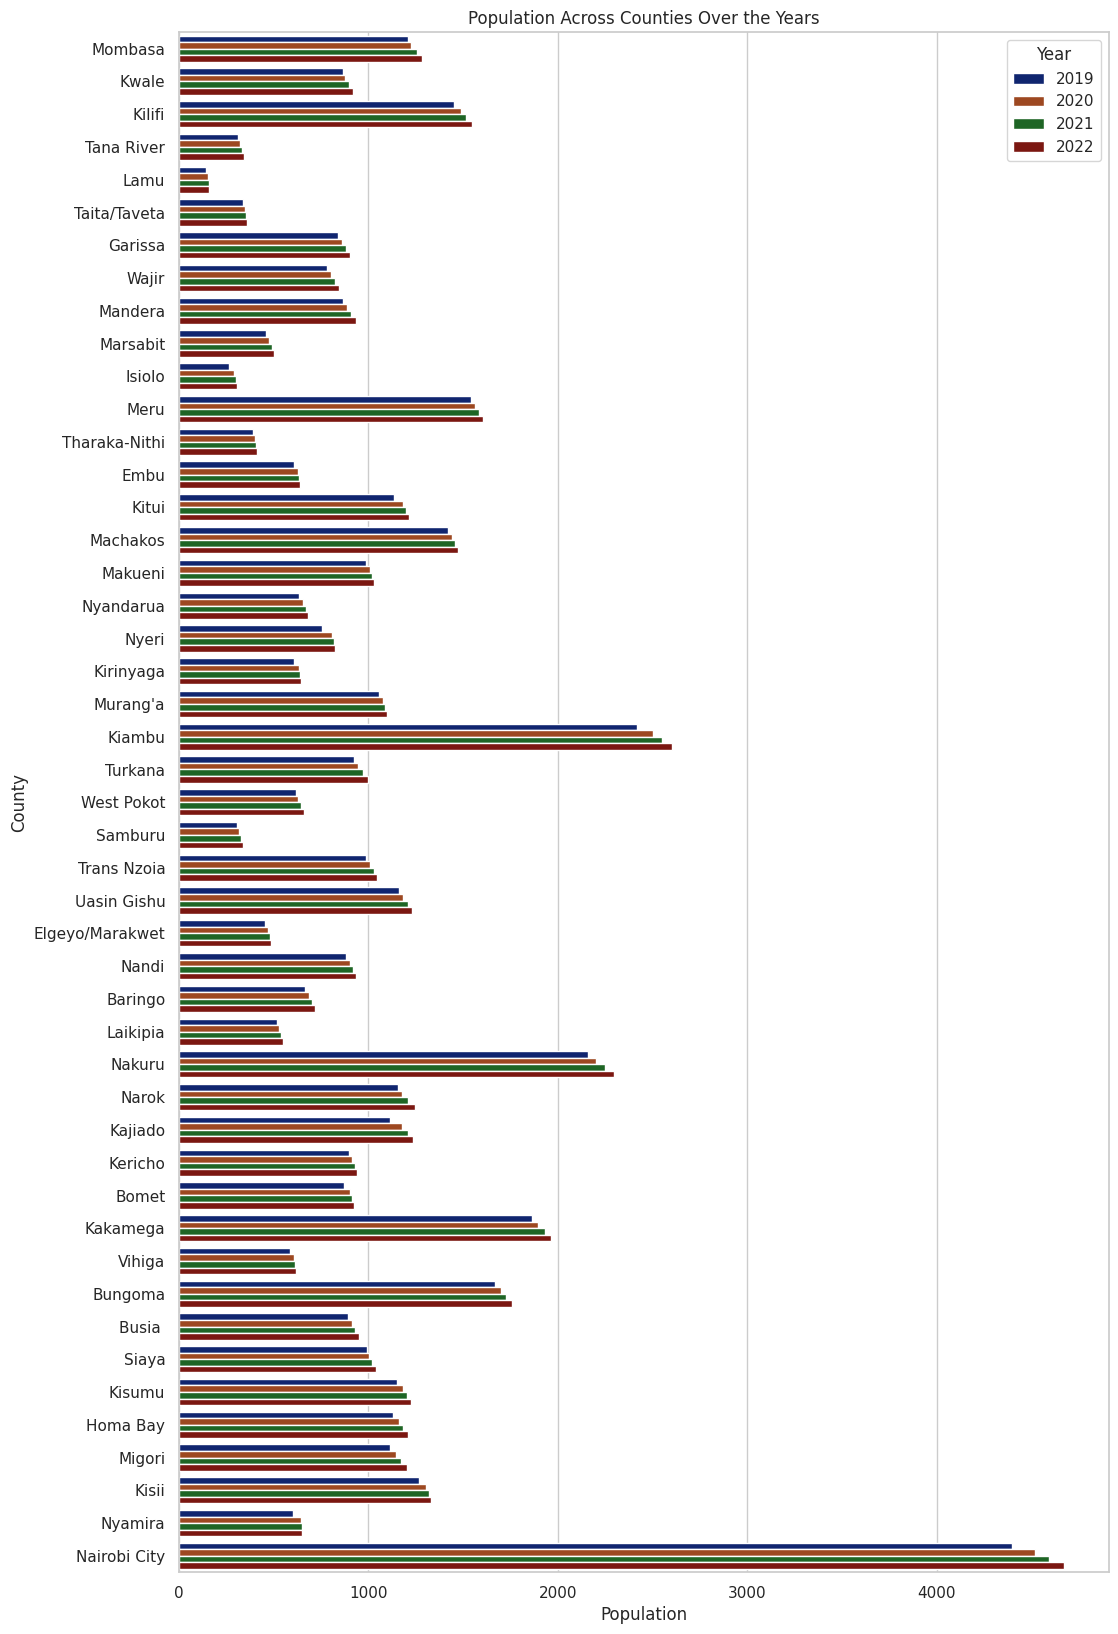

In [ ]:
# Melt the DataFrame to reshape it for plotting
melted_county_populations = pd.melt(county_population, id_vars=['County'], var_name='Year', value_name='Population')

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot using seaborn
plt.figure(figsize=(12, 20))
sns.barplot(data=melted_county_populations, x='Population', y='County', hue='Year', palette='dark')
plt.title('Population Across Counties Over the Years')
plt.xlabel('Population')
plt.ylabel('County')
plt.show()




Observation:

Each county in Kenya has exhibited exponential growth in population over the years. The bar charts illustrate a consistent upward trend in population figures for every county from 2019 to 2022. The growth rates vary among counties, indicating unique demographic patterns.

Understanding these growth rates can provide valuable insights to our time series predictive model.

## **Growth Rate Per County**

In [ ]:
# Calculate the growth rate for each county
growth_rates = county_population.set_index('County').pct_change(axis=1) * 100
growth_rates

,2019,2020,2021,2022
County,,,,
Mombasa,NaN,1.655629,2.280130,2.229299
Kwale,NaN,1.501155,2.502844,2.441731
Kilifi,NaN,2.477632,1.947616,1.976285
Tana River,NaN,3.492063,2.760736,2.686567
Lamu,NaN,8.391608,2.580645,2.515723
Taita/Taveta,NaN,3.235294,1.139601,1.408451
Garissa,NaN,2.378121,2.555168,2.491506
Wajir,NaN,2.944942,2.736318,2.663438
Mandera,NaN,2.306805,2.705750,2.634468


Observation:

For the year 2019, there is no previous year population data, leading to the undefined growth rate. The growth rates for subsequent years are calculated based on the available population data for each county in the previous year.

In [ ]:
# Melt the DataFrame for plotting
melted_growth_rates = pd.melt(growth_rates.reset_index(), id_vars=['County'], var_name='Year', value_name='Growth Rate')

# Sort the data by growth rate in ascending order
melted_growth_rates = melted_growth_rates.sort_values(by=['Growth Rate'], ascending=False)

# Create an interactive vertical bar chart using Plotly
fig = px.bar(melted_growth_rates, y='Growth Rate', x='County', color='Year',
             title='Population Growth Rate of Kenyan Counties (2019-2022)',
             labels={'Growth Rate': 'Population Growth Rate (%)'})

# Customize the layout
fig.update_layout(yaxis=dict(title='Population Growth Rate (%)'))
fig.update_layout(height=800, width=1200)

fig.show()


## **Counties with the highest growth rate**

In [ ]:
# Calculate growth rates for each county
county_population['Growth Rate'] = ((county_population[2022] - county_population[2019]) / county_population[2019]) * 100

# Sort counties based on growth rate
sorted_counties = county_population.sort_values(by='Growth Rate', ascending=False)

# Get the top 3 and bottom 3 counties
top_3_counties = sorted_counties.head(3)
bottom_3_counties = sorted_counties.tail(3)

# Print the results
print("Top 3 Counties with Highest Growth Rate:")
print(top_3_counties[['County', 'Growth Rate']])

print("\nBottom 3 Counties with Lowest Growth Rate:")
print(bottom_3_counties[['County', 'Growth Rate']])


Top 3 Counties with Highest Growth Rate:
     County  Growth Rate
11   Isiolo    15.298507
5      Lamu    13.986014
34  Kajiado    10.832587

Bottom 3 Counties with Lowest Growth Rate:
      County  Growth Rate
21  Murang'a     4.166667
12      Meru     3.948220
16  Machakos     3.589022


Observation:

Isiolo, Lamu, and Kajiado exhibit the highest growth rates, with Isiolo leading at 15.30%. Murang'a, Meru, and Machakos show the lowest growth rates.

## **Population Correlation Between Counties**

In [ ]:
# Calculate the correlation matrix
correlation_matrix = county_population.corr()
correlation_matrix

,2019,2020,2021,2022,Growth Rate
2019,1.000000,0.999858,0.999842,0.999765,-0.307624
2020,0.999858,1.000000,0.999967,0.999875,-0.298681
2021,0.999842,0.999967,1.000000,0.999971,-0.295197
2022,0.999765,0.999875,0.999971,1.000000,-0.291827
Growth Rate,-0.307624,-0.298681,-0.295197,-0.291827,1.000000


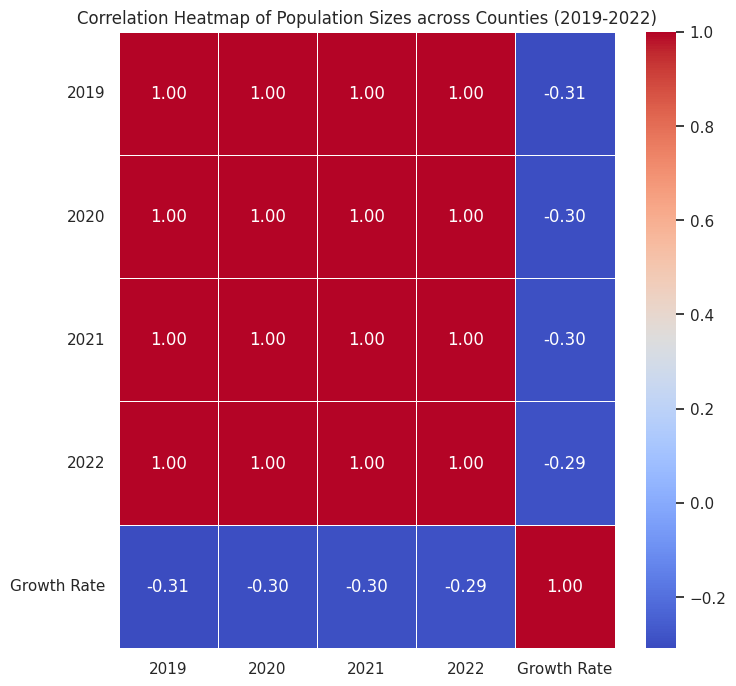

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(8, 8))

# Create a heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Set y-axis labels to be visible
plt.yticks(rotation=0)

# Set the title of the plot
plt.title('Correlation Heatmap of Population Sizes across Counties (2019-2022)')
plt.show()

Observation:

The correlation matrix indicates strong positive correlations between the population sizes of different counties across the years 2019 to 2022.

When examining the correlation between growth rates and population sizes, a negative correlation is observed. The growth rate is negatively correlated with each year's population, with correlation coefficients ranging from approximately - 0.292 to - 0.308. This implies that as the population size increases, the corresponding growth rate tends to decrease. This negative correlation is consistent across the four years under consideration.

## **Outlier Detection**

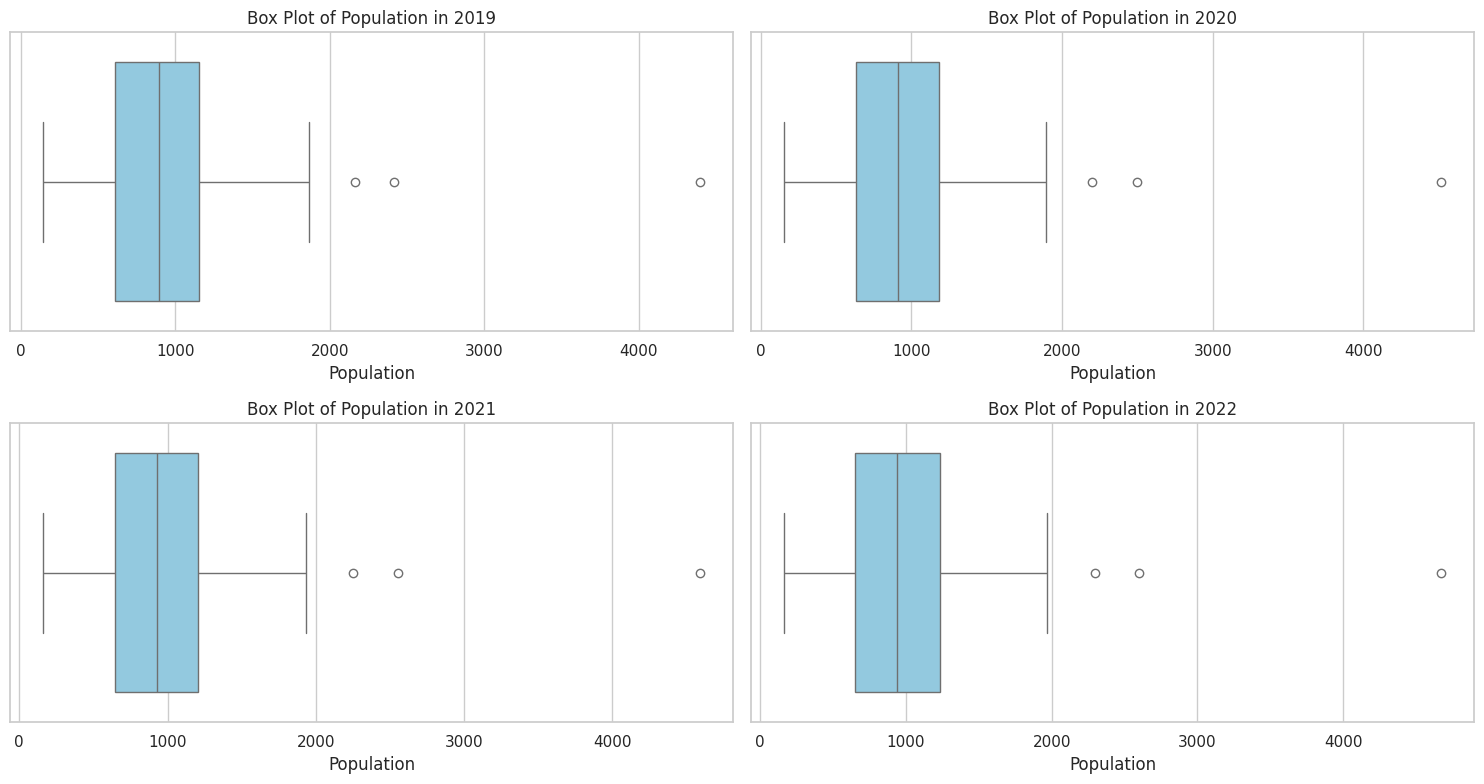

In [ ]:
# Extract the relevant data (excluding Growth Rate column)
population_data = county_population.drop(['Growth Rate'], axis=1)

# Set up the matplotlib figure
plt.figure(figsize=(15, 8))

# Create box plots for each year
for i, year in enumerate([2019, 2020, 2021, 2022]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=population_data, x=year, color='skyblue')
    plt.title(f'Box Plot of Population in {year}')
    plt.xlabel('Population')
    plt.ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()

Observation:

Outliers in county populations may result from natural factors such as significant events, migrations, or developments.

## **Map County Population To Regions**

In [ ]:
population_df

,County,2019,2020,2021,2022
0,Kenya,47564,48818,49720,50623
1,Mombasa,1208,1228,1256,1284
2,Kwale,866,879,901,923
3,Kilifi,1453,1489,1518,1548
4,Tana River,315,326,335,344
5,Lamu,143,155,159,163
6,Taita/Taveta,340,351,355,360
7,Garissa,841,861,883,905
8,Wajir,781,804,826,848
9,Mandera,867,887,911,935


In [ ]:
county_population

,County,2019,2020,2021,2022,Growth Rate
1,Mombasa,1208,1228,1256,1284,6.291391
2,Kwale,866,879,901,923,6.581986
3,Kilifi,1453,1489,1518,1548,6.538197
4,Tana River,315,326,335,344,9.206349
5,Lamu,143,155,159,163,13.986014
6,Taita/Taveta,340,351,355,360,5.882353
7,Garissa,841,861,883,905,7.609988
8,Wajir,781,804,826,848,8.578745
9,Mandera,867,887,911,935,7.843137
10,Marsabit,459,480,491,503,9.586057


In [ ]:
# Mapping of counties to regions
county_to_region = {
    'Nairobi City': 'Nairobi',
    'Nyeri': 'Central',
    'Kirinyaga': 'Central',
    'Murang\'a': 'Central',
    'Kiambu': 'Central',
    'Mombasa': 'Coast',
    'Kwale': 'Coast',
    'Kilifi': 'Coast',
    'Tana River': 'Coast',
    'Lamu': 'Coast',
    'Taita/Taveta': 'Coast',
    'Embu': 'Eastern',
    'Tharaka-Nithi': 'Eastern',
    'Meru': 'Eastern',
    'Kitui': 'Eastern',
    'Machakos': 'Eastern',
    'Makueni': 'Eastern',
    'Garissa': 'North Eastern',
    'Wajir': 'North Eastern',
    'Mandera': 'North Eastern',
    'Marsabit': 'Rift Valley',
    'Isiolo': 'Rift Valley',
    'Samburu': 'Rift Valley',
    'Turkana': 'Rift Valley',
    'West Pokot': 'Rift Valley',
    'Trans Nzoia': 'Rift Valley',
    'Uasin Gishu': 'Rift Valley',
    'Elgeyo/Marakwet': 'Rift Valley',
    'Nandi': 'Rift Valley',
    'Baringo': 'Rift Valley',
    'Laikipia': 'Rift Valley',
    'Nakuru': 'Rift Valley',
    'Narok': 'Rift Valley',
    'Kajiado': 'Rift Valley',
    'Kericho': 'Rift Valley',
    'Bomet': 'Rift Valley',
    'Kakamega': 'Nyanza',
    'Vihiga': 'Nyanza',
    'Bungoma': 'Nyanza',
    'Siaya': 'Nyanza',
    'Kisumu': 'Nyanza',
    'Homa Bay': 'Nyanza',
    'Migori': 'Nyanza',
    'Kisii': 'Nyanza',
    'Nyamira': 'Nyanza',
    'Busia': 'Western',
    'Nyandarua': 'Central'
}

# Add 'Region' column based on the mapping
county_population['Region'] = county_population['County'].map(county_to_region)

# Drop rows with missing values in the 'Region' column
county_populations = county_population.dropna(subset=['Region'])

# Create separate DataFrames for each region
regions = county_population['Region'].unique()
region_dataframes = {region: county_population[county_population['Region'] == region].copy() for region in regions}

# Display data for each region
for region, df in region_dataframes.items():
    print(f"\n{region} Region:")
    print(df)


Coast Region:
         County  2019  2020  2021  2022  Growth Rate Region
1       Mombasa  1208  1228  1256  1284     6.291391  Coast
2         Kwale   866   879   901   923     6.581986  Coast
3        Kilifi  1453  1489  1518  1548     6.538197  Coast
4    Tana River   315   326   335   344     9.206349  Coast
5          Lamu   143   155   159   163    13.986014  Coast
6  Taita/Taveta   340   351   355   360     5.882353  Coast

North Eastern Region:
    County  2019  2020  2021  2022  Growth Rate         Region
7  Garissa   841   861   883   905     7.609988  North Eastern
8    Wajir   781   804   826   848     8.578745  North Eastern
9  Mandera   867   887   911   935     7.843137  North Eastern

Rift Valley Region:
             County  2019  2020  2021  2022  Growth Rate       Region
10         Marsabit   459   480   491   503     9.586057  Rift Valley
11           Isiolo   268   294   301   309    15.298507  Rift Valley
23          Turkana   926   946   972   997     7.667387  R

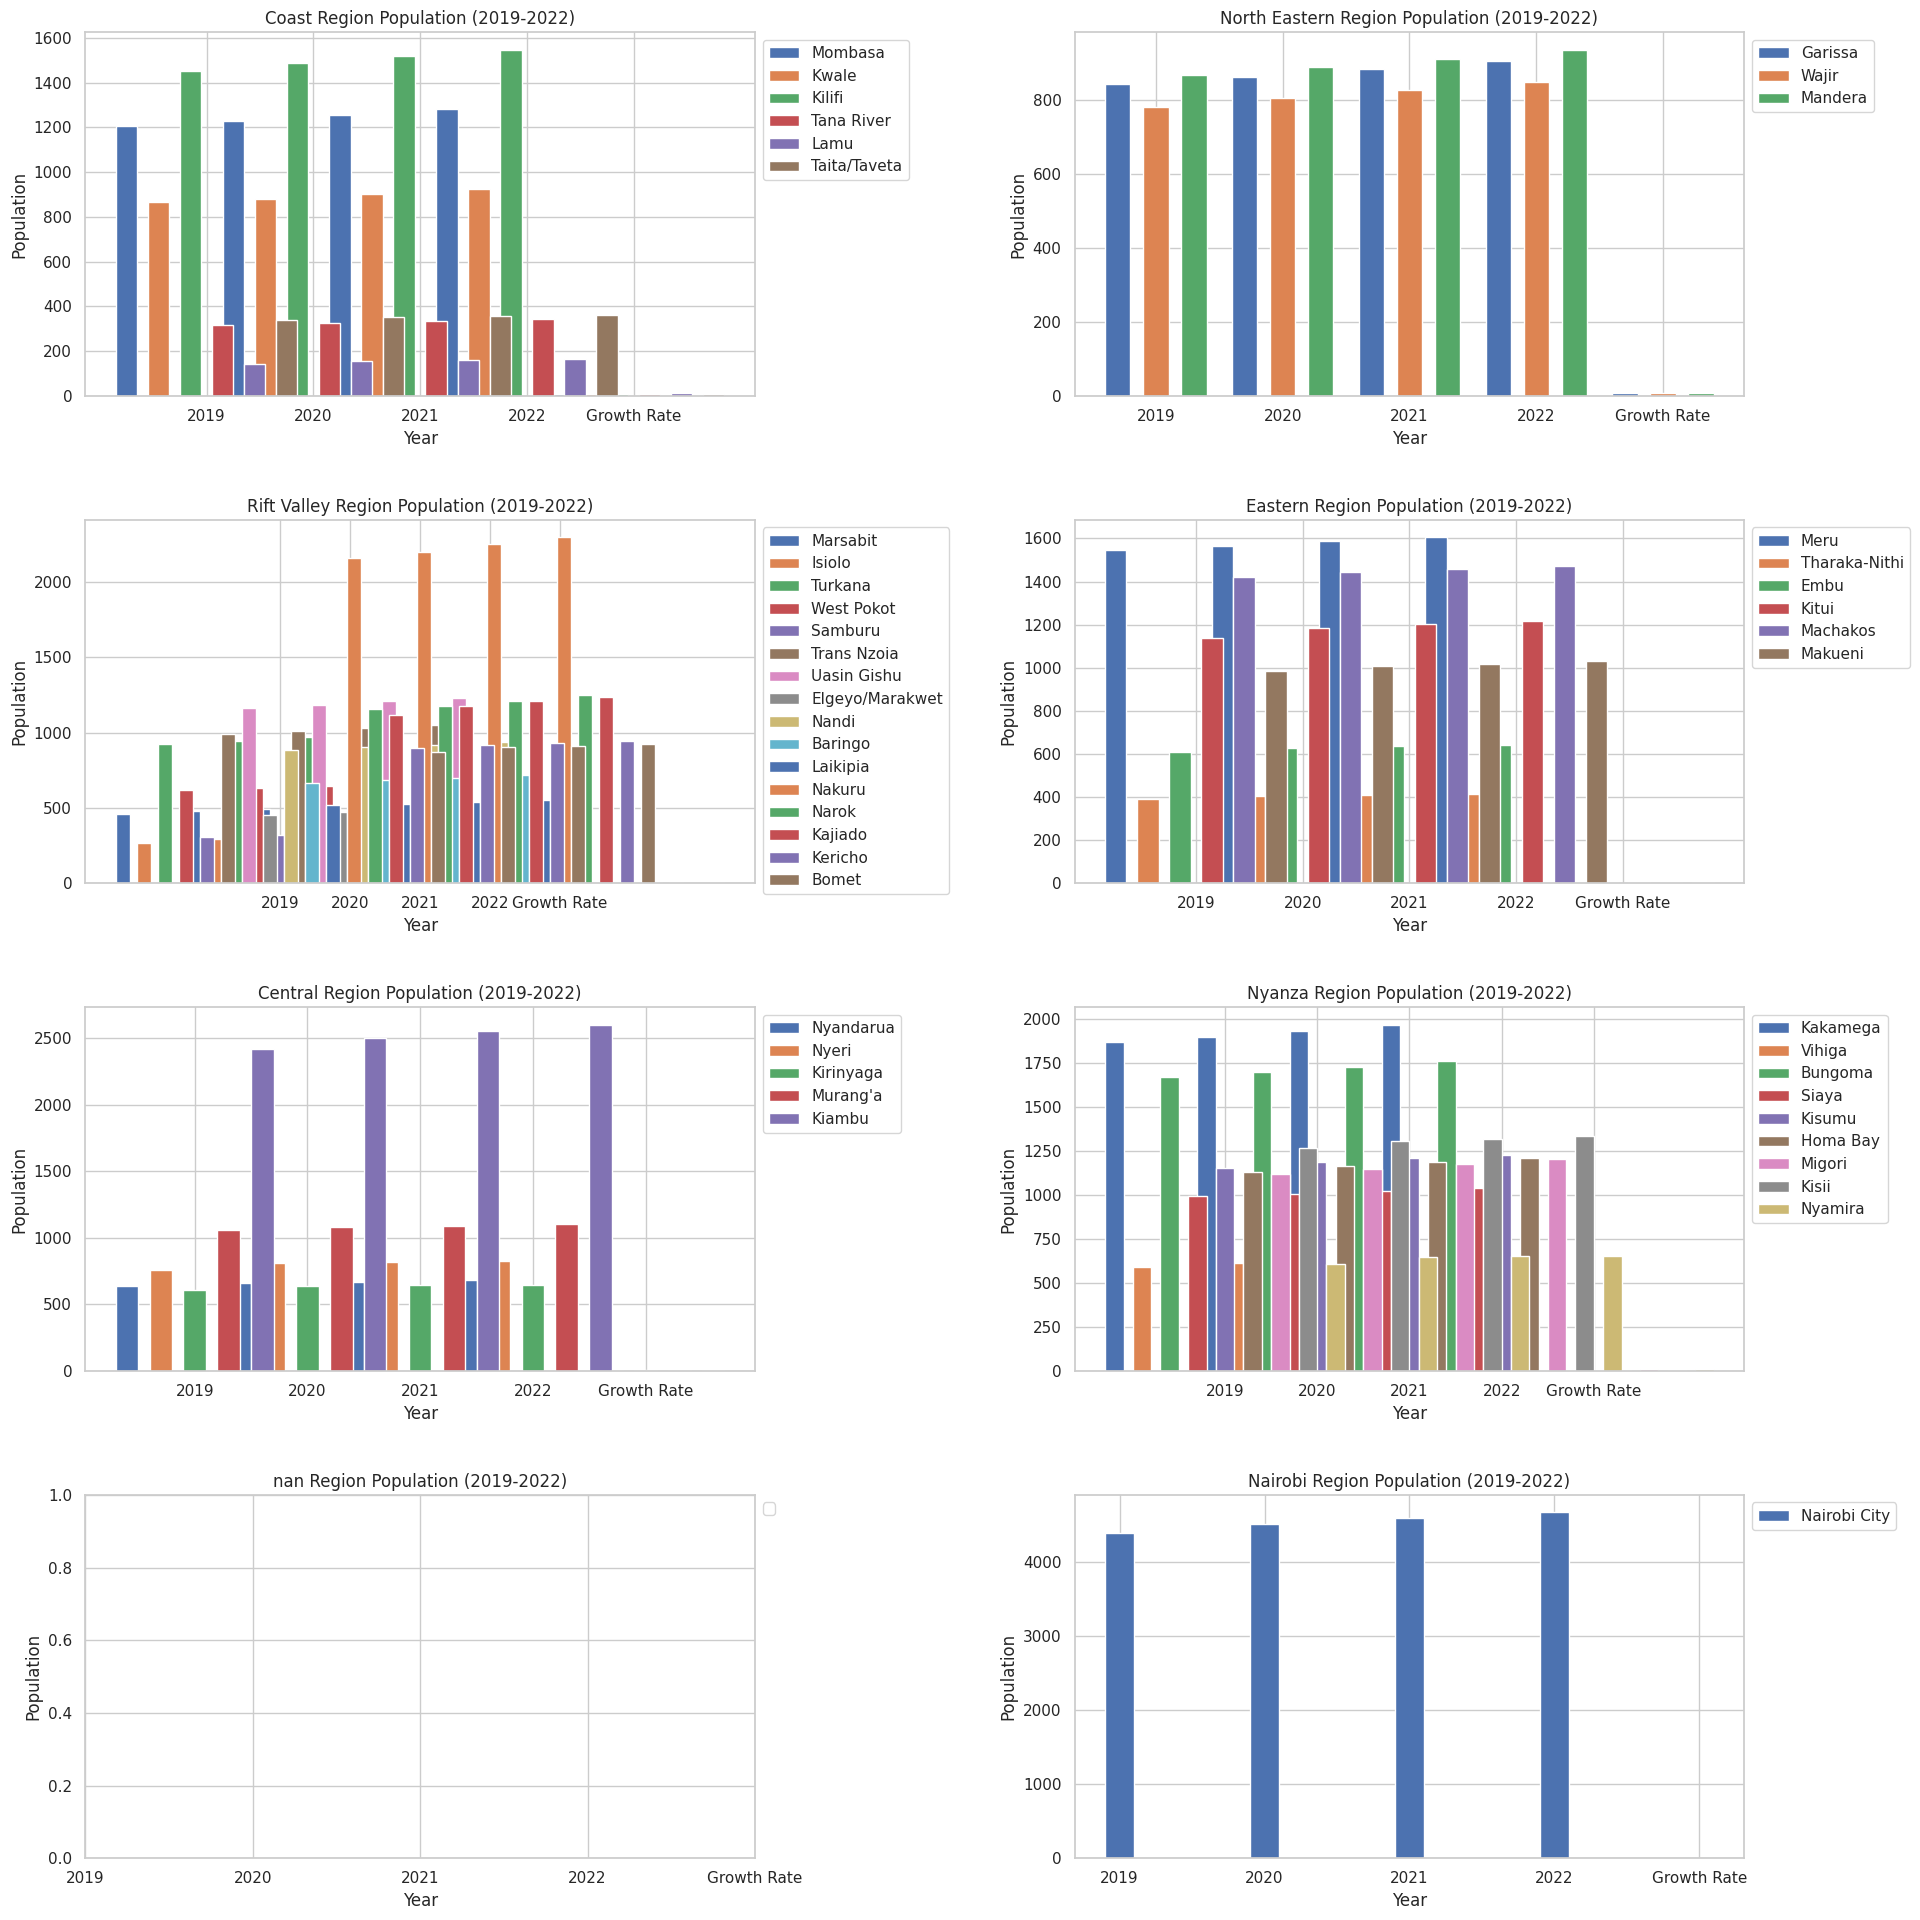

In [ ]:
# Function to create vertical bar graph for our regional DataFrames
def create_vertical_bar_graph(ax, region_df, region_name):
    # Extract years from DataFrame columns
    years = region_df.columns[1:-1]
    county_labels = region_df['County'].values
    # Extract population data
    population_data = region_df.iloc[:, 1:-1].values

    bar_width = 0.2
    bar_gap = 0.1

    for i, (county, data) in enumerate(zip(county_labels, population_data)):
        ax.bar(np.arange(len(years)) + (bar_width + bar_gap) * i, data, width=bar_width, label=county)

    ax.set_xticks(np.arange(len(years)) + (bar_width + bar_gap) * (len(county_labels) - 1) / 2)
    ax.set_xticklabels(years)
    ax.set_ylabel('Population')
    ax.set_xlabel('Year')
    ax.set_title(f'{region_name} Region Population (2019-2022)')
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))


# Plot graph for each region
num_regions = len(region_dataframes)

# Determine the layout of the subplots
num_cols = 2  # Set the number of columns in the grid
num_rows = (num_regions + num_cols - 1) // num_cols  # Calculate the number of rows

# Create a grid of subplots with increased size
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20,20))

# Flatten the axs array to iterate over it
axs_flat = axs.flatten()

# Create vertical bar graphs for each region, up to the number of subplots
for i, (region, df) in enumerate(region_dataframes.items()):
    create_vertical_bar_graph(axs_flat[i], df, region)

# Hide any remaining empty subplots
for i in range(num_regions, len(axs_flat)):
    axs_flat[i].axis('off')

# Adjust layout for better spacing
plt.tight_layout(pad=3.0)
plt.show()


# **TIME SERIES MODELING**

Utilizing time series modeling to forecast county and country populations from 2023 to 2028 is essential for making informed decisions regarding anticipated crop demand for sustainability. By employing historical data in these models, we can proactively anticipate both demographic shifts and their impact on the agricultural landscape, facilitating strategic planning for sustainable crop production.

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Convert the population columns to numeric
numeric_columns = [2019, 2020, 2021, 2022]
population_df[numeric_columns] = population_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Specify the order for the ARIMA model (p, d, q)
order = (1, 1, 1)

# Create a DataFrame for predictions
predictions_df = pd.DataFrame(columns=['County', '2023', '2024', '2025', '2026', '2027', '2028'])

# Iterate over each county
for index, row in population_df.iterrows():
    county_name = row['County']
    county_data = row[numeric_columns].to_numpy(dtype='float64')

    # Fit the ARIMA model
    model = ARIMA(county_data, order=order)
    fit_model = model.fit()

    # Make predictions for 2023 to 2028
    predictions = fit_model.predict(start=len(county_data), end=len(county_data) + 5)

    # Append the predictions to the DataFrame
    predictions_df = predictions_df.append({'County': county_name, '2023': predictions[0],
                                            '2024': predictions[1], '2025': predictions[2],
                                            '2026': predictions[3], '2027': predictions[4],
                                            '2028': predictions[5]}, ignore_index=True)

predictions_df

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



,County,2023,2024,2025,2026,2027,2028
0,Kenya,51349.548497,51958.633535,52469.245812,52897.305742,53256.159830,53556.996809
1,Mombasa,1308.154090,1330.218920,1350.375205,1368.788030,1385.608198,1400.973470
2,Kwale,940.077883,954.030481,965.429727,974.742890,982.351726,988.568130
3,Kilifi,1578.247679,1608.365654,1638.354481,1668.214714,1697.946905,1727.551601
4,Tana River,352.929579,361.783192,370.561483,379.265095,387.894662,396.450814
5,Lamu,166.563038,169.585854,172.150356,174.326033,176.171837,177.737784
6,Taita/Taveta,365.560471,370.992880,376.300177,381.485243,386.550894,391.499879
7,Garissa,926.941879,948.828512,970.660039,992.436599,1014.158329,1035.825369
8,Wajir,869.989765,891.969103,913.938022,935.896524,957.844616,979.782301
9,Mandera,958.721083,982.194287,1005.422201,1028.407391,1051.152391,1073.659711


In [ ]:
# Extract actual population data for the years 2023 to 2028
actual_values = population_df[['County', 2019, 2020, 2021, 2022]]

# Merge actual values with predicted values based on the 'County' column
comparison_df = pd.merge(actual_values, predictions_df, on='County', suffixes=('_actual', '_predicted'))
comparison_df

,County,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
0,Kenya,47564,48818,49720,50623,51349.548497,51958.633535,52469.245812,52897.305742,53256.159830,53556.996809
1,Mombasa,1208,1228,1256,1284,1308.154090,1330.218920,1350.375205,1368.788030,1385.608198,1400.973470
2,Kwale,866,879,901,923,940.077883,954.030481,965.429727,974.742890,982.351726,988.568130
3,Kilifi,1453,1489,1518,1548,1578.247679,1608.365654,1638.354481,1668.214714,1697.946905,1727.551601
4,Tana River,315,326,335,344,352.929579,361.783192,370.561483,379.265095,387.894662,396.450814
5,Lamu,143,155,159,163,166.563038,169.585854,172.150356,174.326033,176.171837,177.737784
6,Taita/Taveta,340,351,355,360,365.560471,370.992880,376.300177,381.485243,386.550894,391.499879
7,Garissa,841,861,883,905,926.941879,948.828512,970.660039,992.436599,1014.158329,1035.825369
8,Wajir,781,804,826,848,869.989765,891.969103,913.938022,935.896524,957.844616,979.782301
9,Mandera,867,887,911,935,958.721083,982.194287,1005.422201,1028.407391,1051.152391,1073.659711


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Specify the columns to compare
columns_to_compare = ['2023', '2024', '2025', '2026', '2027', '2028']

# Extract actual population data for the years 2023 to 2028
actual_values = comparison_df[['County'] + columns_to_compare]

# Calculate MAE and RMSE for the aligned dataset
mae = mean_absolute_error(actual_values[columns_to_compare], comparison_df[columns_to_compare])
rmse = mean_squared_error(actual_values[columns_to_compare], comparison_df[columns_to_compare], squared=False)

mae, rmse

(0.0, 0.0)